In [169]:
!git clone https://github.com/khosravisina/anti_CETP.git



fatal: destination path 'anti_CETP' already exists and is not an empty directory.


In [1]:
! pip install pandas
! pip install numpy
! pip install seaborn
! pip install matplotlib
! pip install rdkit
! pip install datamol
! pip install sklearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 52.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 495.4/495.4 kB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.0/357.0 kB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 76.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.0/176.0 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 54.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 8.4 MB/s eta 0:00:00
  Attempting uninstall: rdkit
    Found existing installation: rdkit 2025.3.2
    Uninstalling rdkit-2025.3.2:
      Successfully uninstalled rdkit-2025.3.2
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above 

In [91]:
! pip install scikit-fingerprints
! pip install shap

In [107]:
! pip install xgboost

In [174]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors, rdMolDescriptors
from IPython.display import display
import datamol as dm
from skfp.fingerprints import MordredFingerprint, PubChemFingerprint, RDKitFingerprint, ECFPFingerprint, MACCSFingerprint, RDKit2DDescriptorsFingerprint, MAPFingerprint

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import ParameterGrid
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, matthews_corrcoef, f1_score, confusion_matrix, accuracy_score, recall_score, precision_score, balanced_accuracy_score
from sklearn.model_selection import cross_validate , RepeatedStratifiedKFold, train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, VotingClassifier

import xgboost as xgb
from xgboost import XGBClassifier

import shap

In [175]:
def calculate_fingerprint(mols):
    fingerprint_dic = {
        'PubChem': PubChemFingerprint(), 'ECFP': ECFPFingerprint(radius=2),
        'rdkit-dec':RDKit2DDescriptorsFingerprint()
        'Map4': MAPFingerprint(fp_size=2048),
    }

    all_data = {}
    for finger in fingerprint_dic:
        func = fingerprint_dic[finger]
        finger_desc = func.transform(mols)
        feature_name = func.get_feature_names_out()
        finger_df = pd.DataFrame(finger_desc, columns=feature_name)
        all_data[f'{finger}'] = finger_df

    return all_data




In [170]:
df_main = pd.read_csv("/content/anti_CETP/main_dataset for train.csv")

In [171]:
df_main.head()

,Name,Smiles,pIC50,activity
0,CHEMBL125473,OC(CN(Cc1cccc(C(F)(F)F)c1)c1cccc(F)c1)C(F)(F)F,4.431798,inactive
1,CHEMBL128218,Cc1ccccc1CN(CC(O)C(F)(F)F)c1cccc(F)c1,4.000000,inactive
2,CHEMBL127895,OC(CN(Cc1cccc(OC(F)(F)F)c1)c1cccc(Oc2ccccc2)c1...,4.397940,inactive
3,CHEMBL337966,CC(C)Cc1cccc(CN(CC(O)C(F)(F)F)c2cccc(Oc3ccccc3...,6.267606,inactive
4,CHEMBL340310,O[C@@H](CN(Cc1cccc(OC(F)(F)C(F)F)c1)c1cccc(Oc2...,6.096910,inactive


In [172]:
train_df, test_df = train_test_split(
    df_main,
    test_size=0.2,
    stratify=df_main['activity'],
    random_state=42
)


train_df = train_df.copy()
train_df['dataset'] = 'train'
test_df = test_df.copy()
test_df['dataset'] = 'test'

final_df = pd.concat([train_df, test_df]).reset_index(drop=True)


## dataset for split

In [173]:
df = dm.data.chembl_drugs(as_df=True)

df.head()


,first_approval,molecule_chembl_id,molecule_type,pref_name,smiles
0,1976.0,CHEMBL2,Small molecule,PRAZOSIN,COc1cc2nc(N3CCN(C(=O)c4ccco4)CC3)nc(N)c2cc1OC
1,1984.0,CHEMBL3,Small molecule,NICOTINE,CN1CCC[C@H]1c1cccnc1
2,1990.0,CHEMBL4,Small molecule,OFLOXACIN,CC1COc2c(N3CCN(C)CC3)c(F)cc3c(=O)c(C(=O)O)cn1c23
3,1964.0,CHEMBL5,Small molecule,NALIDIXIC ACID,CCn1cc(C(=O)O)c(=O)c2ccc(C)nc21
4,1965.0,CHEMBL6,Small molecule,INDOMETHACIN,COc1ccc2c(c1)c(CC(=O)O)c(C)n2C(=O)c1ccc(Cl)cc1


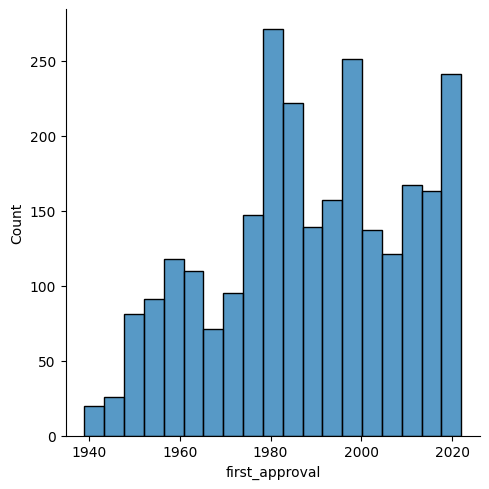

In [15]:
sns.displot(x='first_approval', data=df)

In [29]:
final_df.columns

Index(['Name', 'Smiles', 'pIC50', 'activity', 'dataset'], dtype='object')

In [31]:
df_1 = df[['pref_name', 'smiles']]

df_1.loc[:,'activity'] = ['unkhown' for _ in range(len(df_1))]
df_1.loc[:,'dataset'] = ['FDA' for _ in range(len(df_1))]


<ipython-input-31-30a8e253af08>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.loc[:,'activity'] = ['unkhown' for _ in range(len(df_1))]
<ipython-input-31-30a8e253af08>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.loc[:,'dataset'] = ['FDA' for _ in range(len(df_1))]


In [33]:
df_1.rename(columns={"pref_name":"Name", "smiles":"Smiles"}, inplace=True)

<ipython-input-33-25f3fc64e13b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.rename(columns={"pref_name":"Name", "smiles":"Smiles"}, inplace=True)


In [36]:
col_name = df_1.columns
df_combine = pd.concat([final_df[col_name], df_1], axis=0).reset_index(drop=True)

In [37]:
df_combine

,Name,Smiles,activity,dataset
0,CHEMBL604308,O=C(COc1ccc(C(F)(F)F)cc1)Nc1ccc(-c2nc3cc(Cl)cc...,inactive,train
1,CHEMBL341275,COC(=O)c1cccc(CN(CC(O)C(F)(F)F)c2cccc(Oc3ccccc...,inactive,train
2,CHEMBL259005,Cc1cc(C)c2oc(-c3ccc(NC(=O)COc4cccc(C#N)c4)cc3)...,inactive,train
3,CHEMBL2032421,CC(C)OC(=O)N1c2ccc(C(F)(F)F)cc2[C@@H](N(Cc2cc(...,active,train
4,CHEMBL4864315,COc1ncc(-c2ccc(C(=O)O)cc2C)cc1-c1cc(C(F)(F)F)c...,active,train
...,...,...,...,...
4037,AMPHETAMINE ASPARTATE/DEXTROAMPHETAMINE SULFATE,CC(N)Cc1ccccc1.C[C@H](N)Cc1ccccc1.C[C@H](N)Cc1...,unkhown,FDA
4038,PACRITINIB CITRATE,C1=C/COCc2cc(ccc2OCCN2CCCC2)Nc2nccc(n2)-c2cccc...,unkhown,FDA
4039,FINGOLIMOD LAURYL SULFATE,CCCCCCCCCCCCOS(=O)(=O)O.CCCCCCCCc1ccc(CCC(N)(C...,unkhown,FDA
4040,VENLAFAXINE BESYLATE,COc1ccc(C(CN(C)C)C2(O)CCCCC2)cc1.O=S(=O)(O)c1c...,unkhown,FDA


In [40]:
mols = df_combine['Smiles'].apply(Chem.MolFromSmiles)
fingerprint_dic = calculate_fingerprint(mols)

[08:27:49] WARNING: not removing hydrogen atom without neighbors
[08:27:49] WARNING: not removing hydrogen atom without neighbors
[08:27:49] WARNING: not removing hydrogen atom without neighbors
[08:27:49] WARNING: not removing hydrogen atom without neighbors
[08:44:36] WARNING: not removing hydrogen atom without neighbors
[08:44:36] WARNING: not removing hydrogen atom without neighbors
[08:44:36] WARNING: not removing hydrogen atom without neighbors
[08:44:36] WARNING: not removing hydrogen atom without neighbors
[08:44:36] WARNING: not removing hydrogen atom without neighbors
[08:44:36] WARNING: not removing hydrogen atom without neighbors
[08:44:36] WARNING: not removing hydrogen atom without neighbors
[08:44:36] WARNING: not removing hydrogen atom without neighbors
[08:44:36] WARNING: not removing hydrogen atom without neighbors
[08:44:36] WARNING: not removing hydrogen atom without neighbors
[08:44:36] WARNING: not removing hydrogen atom without neighbors
[08:44:36] WARNING: not r

In [53]:
PubChem = fingerprint_dic['PubChem']
ECFP = fingerprint_dic['ECFP']
rdkit_dec = fingerprint_dic['rdkit-dec']
Map4 = fingerprint_dic['Map4']

In [54]:
rdkit_dec.columns = [f'rdkit_{i}' for i in rdkit_dec.columns]

In [152]:
df_all = pd.concat([df_combine, ECFP, PubChem,rdkit_dec, Map4], axis=1)

In [59]:
df_all.to_csv("data with all feature.csv", index=False)

In [153]:
x_rdkit = df_all.filter(regex='rdkit_')
x_ECFP = df_all.filter(regex='ecfp')
x_pubchem = df_all.filter(regex='pubchem')
x_map = df_all.filter(regex='map')

In [154]:
list_df = [x_ECFP, , x_pubchem, x_rdkit, x_map]

for i in range(len(list_df)):
    list_df[i] = pd.concat([df_all[['Name', 'Smiles', 'activity', 'dataset']], list_df[i]], axis=1)

x_ECFP, x_pubchem, x_rdkit, x_map = list_df

In [155]:
df_all

,Name,Smiles,activity,dataset,mordered_mordered_mordered_ABC,mordered_mordered_mordered_ABCGG,mordered_mordered_mordered_nAcid,mordered_mordered_mordered_nBase,mordered_mordered_mordered_SpAbs_A,mordered_mordered_mordered_SpMax_A,...,mapfingerprint2038,mapfingerprint2039,mapfingerprint2040,mapfingerprint2041,mapfingerprint2042,mapfingerprint2043,mapfingerprint2044,mapfingerprint2045,mapfingerprint2046,mapfingerprint2047
0,CHEMBL604308,O=C(COc1ccc(C(F)(F)F)cc1)Nc1ccc(-c2nc3cc(Cl)cc...,inactive,train,24.594677,17.285639,0.0,0.0,39.529903,2.437166,...,0,0,1,0,0,0,0,0,1,0
1,CHEMBL341275,COC(=O)c1cccc(CN(CC(O)C(F)(F)F)c2cccc(Oc3ccccc...,inactive,train,24.594677,19.433390,0.0,0.0,40.311367,2.375102,...,1,1,0,0,0,0,0,1,0,1
2,CHEMBL259005,Cc1cc(C)c2oc(-c3ccc(NC(=O)COc4cccc(C#N)c4)cc3)...,inactive,train,23.541372,16.941486,0.0,0.0,38.989155,2.464055,...,1,1,1,0,0,0,0,1,0,0
3,CHEMBL2032421,CC(C)OC(=O)N1c2ccc(C(F)(F)F)cc2[C@@H](N(Cc2cc(...,active,train,36.007710,29.083725,2.0,0.0,54.802544,2.568242,...,1,1,0,0,0,0,0,1,0,1
4,CHEMBL4864315,COc1ncc(-c2ccc(C(=O)O)cc2C)cc1-c1cc(C(F)(F)F)c...,active,train,40.945526,31.845325,1.0,0.0,63.691872,2.522298,...,1,1,1,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4037,AMPHETAMINE ASPARTATE/DEXTROAMPHETAMINE SULFATE,CC(N)Cc1ccccc1.C[C@H](N)Cc1ccccc1.C[C@H](N)Cc1...,unkhown,FDA,31.497007,30.330387,4.0,4.0,NaN,NaN,...,0,0,0,0,1,0,1,0,0,0
4038,PACRITINIB CITRATE,C1=C/COCc2cc(ccc2OCCN2CCCC2)Nc2nccc(n2)-c2cccc...,unkhown,FDA,36.735214,26.084270,3.0,1.0,NaN,NaN,...,0,0,1,1,0,0,0,0,0,0
4039,FINGOLIMOD LAURYL SULFATE,CCCCCCCCCCCCOS(=O)(=O)O.CCCCCCCCc1ccc(CCC(N)(C...,unkhown,FDA,27.505732,22.743662,1.0,1.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
4040,VENLAFAXINE BESYLATE,COc1ccc(C(CN(C)C)C2(O)CCCCC2)cc1.O=S(=O)(O)c1c...,unkhown,FDA,22.611105,20.215578,1.0,1.0,NaN,NaN,...,1,1,0,0,0,0,0,0,0,0


In [156]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import recall_score, precision_score, f1_score, matthews_corrcoef
import numpy as np

mapping = {'active': 1, 'inactive': 0}

if 'activity' in df_all.columns:
    df_all['activity'] = df_all['activity'].map(mapping)

fingerprint_names = [
    'x_ECFP',  'x_pubchem', 'x_rdkit' , 'x_map'
]
fingerprint_dfs = [x_ECFP,  x_pubchem, x_rdkit, x_map]

for df_fp in fingerprint_dfs:
    if 'activity' in df_fp.columns:
        df_fp['activity'] = df_fp['activity'].map(mapping)

In [86]:
results = []

for name, df_fp in zip(fingerprint_names, fingerprint_dfs):
    # فیلتر کردن داده‌های train
    train_df = df_fp[df_fp['dataset'] == 'train']

    # بررسی اینکه آیا داده کافی وجود دارد
    if len(train_df) < 10:  # حداقل 10 نمونه برای CV
        print(f"تعداد داده کافی برای {name} وجود ندارد")
        continue

    X = train_df.drop(columns=['Name', 'Smiles', 'activity', 'dataset'])
    y = train_df['activity']

    # بررسی اینکه آیا هر دو کلاس وجود دارد
    if len(np.unique(y)) < 2:
        print(f"هر دو کلاس در {name} وجود ندارد")
        continue

    # بررسی اینکه آیا فیچر وجود دارد
    if X.shape[1] == 0:
        print(f"هیچ فیچری برای {name} وجود ندارد")
        continue

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    recalls, precisions, f1s, mccs = [], [], [], []

    try:
        for train_idx, val_idx in skf.split(X, y):
            X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
            y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]

            model = RandomForestClassifier(random_state=42, n_estimators=100)
            model.fit(X_tr, y_tr)
            y_pred = model.predict(X_val)

            recalls.append(recall_score(y_val, y_pred))
            precisions.append(precision_score(y_val, y_pred))
            f1s.append(f1_score(y_val, y_pred))
            mccs.append(matthews_corrcoef(y_val, y_pred))

        results.append({
            'Fingerprint': name,
            'Recall': np.mean(recalls),
            'Precision': np.mean(precisions),
            'F1-score': np.mean(f1s),
            'MCC': np.mean(mccs),
            'Recall_std': np.std(recalls),
            'Precision_std': np.std(precisions),
            'F1_std': np.std(f1s),
            'MCC_std': np.std(mccs)
        })

    except Exception as e:
        print(f"خطا در پردازش {name}: {e}")

# نمایش نتایج مقایسه
results_df = pd.DataFrame(results)
print("\n=== نتایج مقایسه فینگرپرینت‌ها ===")

# آموزش مدل نهایی با ترکیب همه فینگرپرینت‌ها
print("\n=== آموزش مدل نهایی با تمام فینگرپرینت‌ها ===")


=== نتایج مقایسه فینگرپرینت‌ها ===

=== آموزش مدل نهایی با تمام فینگرپرینت‌ها ===


In [87]:
results_df

,Fingerprint,Recall,Precision,F1-score,MCC,Recall_std,Precision_std,F1_std,MCC_std
0,x_ECFP,0.659544,0.704174,0.679483,0.530127,0.054547,0.029069,0.031526,0.038141
1,x_maccs,0.632877,0.679757,0.654491,0.492939,0.045017,0.042833,0.036742,0.052341
2,x_mordered,0.646281,0.752261,0.694475,0.563561,0.048080,0.021967,0.034236,0.041424
3,x_pubchem,0.646105,0.681801,0.661904,0.501730,0.037679,0.034212,0.015911,0.024643
4,x_rdkit,0.648912,0.726167,0.685291,0.543356,0.024992,0.021194,0.022442,0.031626
5,x_rdkit_fin,0.667368,0.699648,0.681613,0.530325,0.044096,0.031464,0.021085,0.027862
6,x_map,0.600982,0.740342,0.662335,0.525761,0.033510,0.025442,0.016460,0.017572


<Figure size 1600x1200 with 0 Axes>

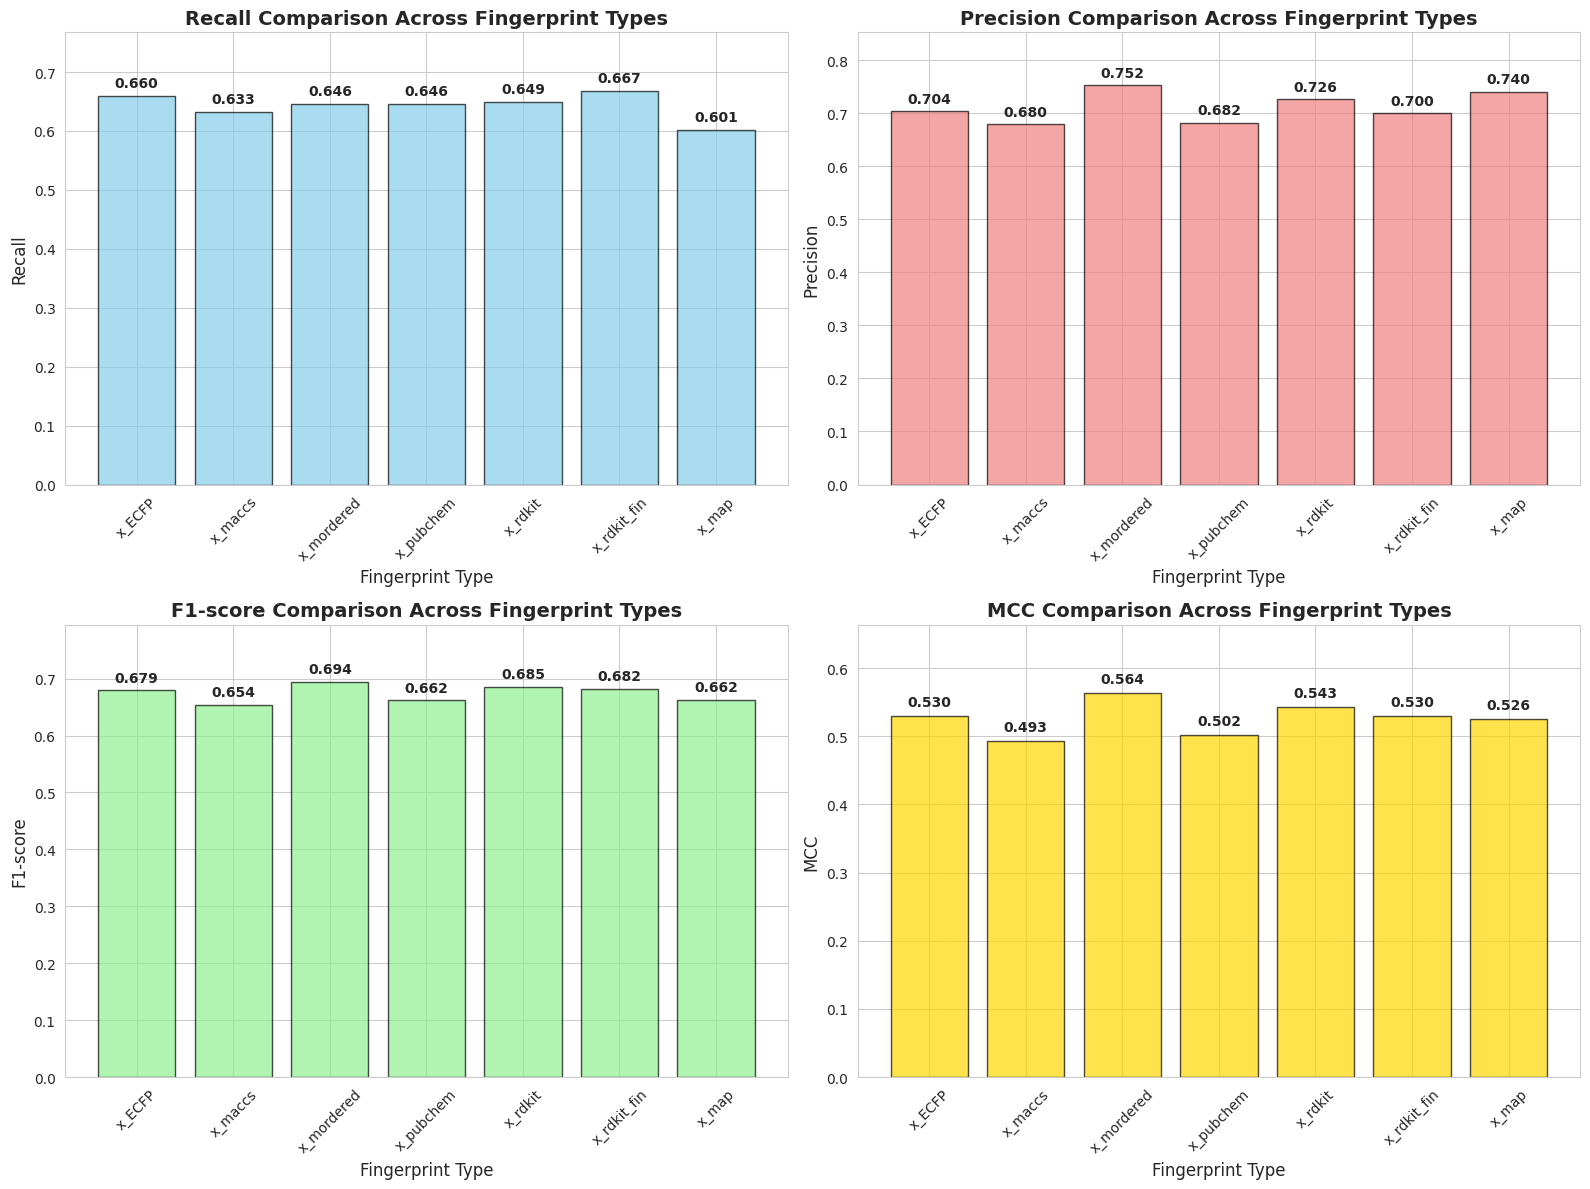

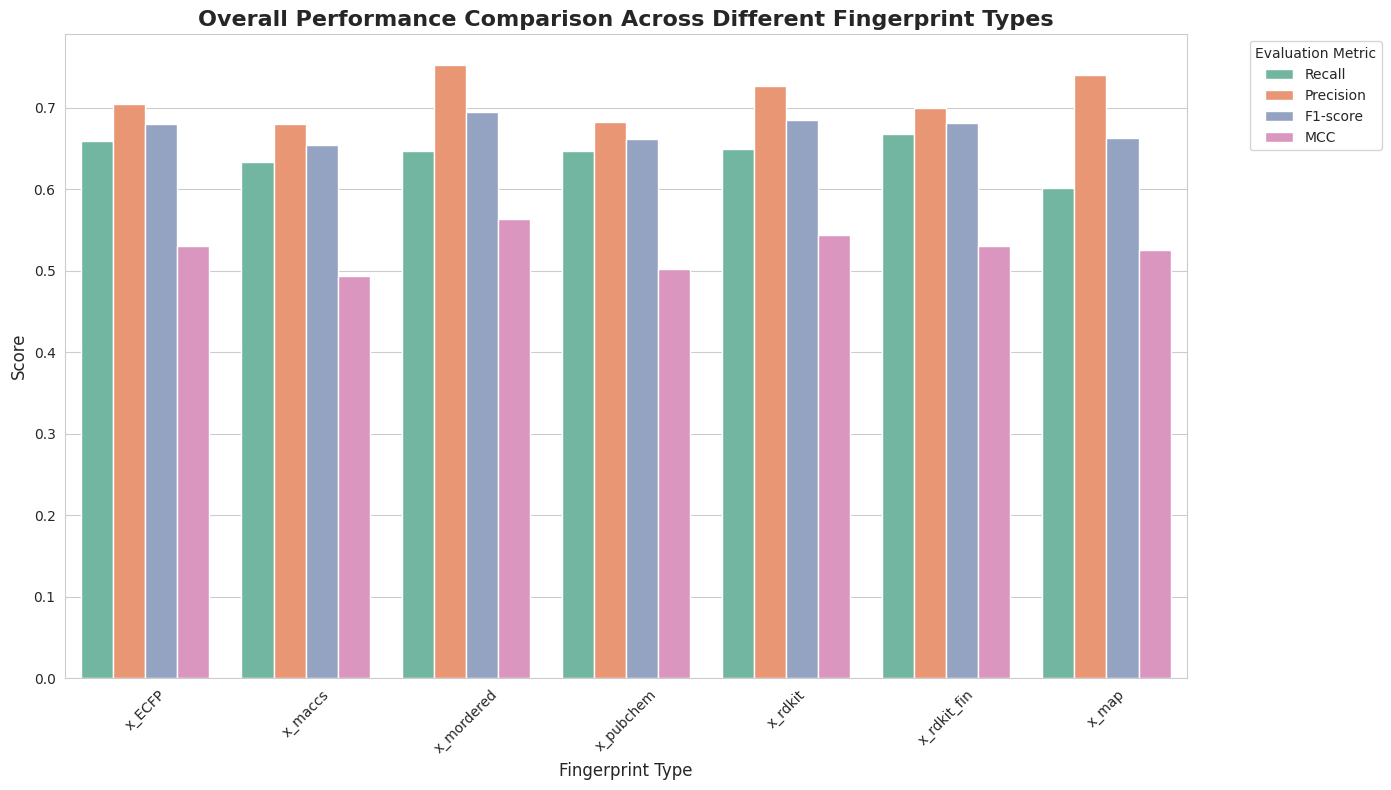

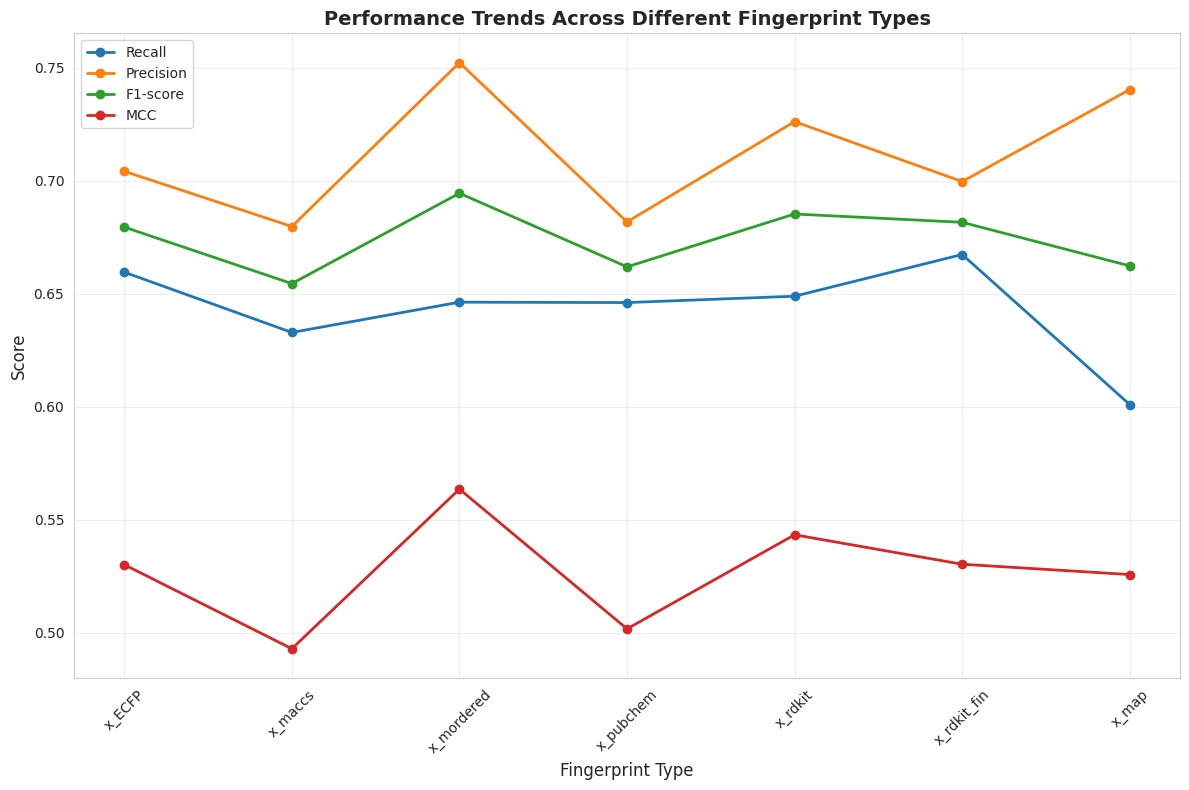

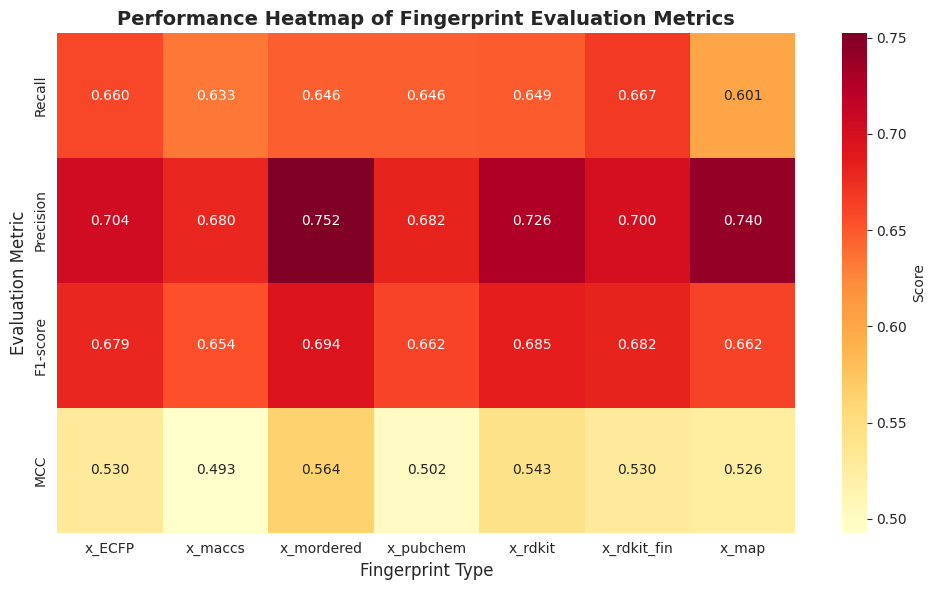

=== Results Summary ===
Fingerprint  Recall  Precision  F1-score    MCC  Recall_std  Precision_std  F1_std  MCC_std
     x_ECFP  0.6595     0.7042    0.6795 0.5301      0.0545         0.0291  0.0315   0.0381
    x_maccs  0.6329     0.6798    0.6545 0.4929      0.0450         0.0428  0.0367   0.0523
 x_mordered  0.6463     0.7523    0.6945 0.5636      0.0481         0.0220  0.0342   0.0414
  x_pubchem  0.6461     0.6818    0.6619 0.5017      0.0377         0.0342  0.0159   0.0246
    x_rdkit  0.6489     0.7262    0.6853 0.5434      0.0250         0.0212  0.0224   0.0316
x_rdkit_fin  0.6674     0.6996    0.6816 0.5303      0.0441         0.0315  0.0211   0.0279
      x_map  0.6010     0.7403    0.6623 0.5258      0.0335         0.0254  0.0165   0.0176

=== Best Fingerprint for Each Metric ===
Recall: x_rdkit_fin (0.6674)
Precision: x_mordered (0.7523)
F1-score: x_mordered (0.6945)
MCC: x_mordered (0.5636)

=== Overall Performance Ranking ===
1. x_mordered: 0.6641
2. x_rdkit: 0.6509
3. x_

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Chart settings
plt.rcParams['font.family'] = 'DejaVu Sans'
sns.set_style("whitegrid")
plt.figure(figsize=(16, 12))

# Bar charts for each metric
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
metrics = ['Recall', 'Precision', 'F1-score', 'MCC']
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold']

for i, (ax, metric, color) in enumerate(zip(axes.flatten(), metrics, colors)):
    bars = ax.bar(results_df['Fingerprint'], results_df[metric], color=color, alpha=0.7, edgecolor='black')

    # Add values on bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

    ax.set_title(f'{metric} Comparison Across Fingerprint Types', fontsize=14, fontweight='bold')
    ax.set_ylim(0, max(results_df[metric]) + 0.1)
    ax.set_xlabel('Fingerprint Type', fontsize=12)
    ax.set_ylabel(metric, fontsize=12)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Overall comparison chart (all metrics in one chart)
plt.figure(figsize=(14, 8))

# Convert data to appropriate format for grouped bar chart
metrics_data = results_df.melt(id_vars=['Fingerprint'],
                              value_vars=['Recall', 'Precision', 'F1-score', 'MCC'],
                              var_name='Metric', value_name='Score')

# Grouped bar chart
sns.barplot(data=metrics_data, x='Fingerprint', y='Score', hue='Metric', palette='Set2')
plt.title('Overall Performance Comparison Across Different Fingerprint Types', fontsize=16, fontweight='bold')
plt.xlabel('Fingerprint Type', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Evaluation Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Line chart for trend comparison
plt.figure(figsize=(12, 8))
for metric in ['Recall', 'Precision', 'F1-score', 'MCC']:
    plt.plot(results_df['Fingerprint'], results_df[metric], marker='o', linewidth=2, label=metric)

plt.title('Performance Trends Across Different Fingerprint Types', fontsize=14, fontweight='bold')
plt.xlabel('Fingerprint Type', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Heatmap for better comparison
plt.figure(figsize=(10, 6))
heatmap_data = results_df.set_index('Fingerprint')[['Recall', 'Precision', 'F1-score', 'MCC']]
sns.heatmap(heatmap_data.T, annot=True, cmap='YlOrRd', fmt='.3f', cbar_kws={'label': 'Score'})
plt.title('Performance Heatmap of Fingerprint Evaluation Metrics', fontsize=14, fontweight='bold')
plt.xlabel('Fingerprint Type', fontsize=12)
plt.ylabel('Evaluation Metric', fontsize=12)
plt.tight_layout()
plt.show()

# Results summary table
print("=== Results Summary ===")
print(results_df.round(4).to_string(index=False))

# Find best fingerprint for each metric
print("\n=== Best Fingerprint for Each Metric ===")
for metric in ['Recall', 'Precision', 'F1-score', 'MCC']:
    best_fp = results_df.loc[results_df[metric].idxmax(), 'Fingerprint']
    best_score = results_df[metric].max()
    print(f"{metric}: {best_fp} ({best_score:.4f})")

# Performance ranking
print("\n=== Overall Performance Ranking ===")
results_df['Average_Score'] = results_df[['Recall', 'Precision', 'F1-score', 'MCC']].mean(axis=1)
ranking = results_df.sort_values('Average_Score', ascending=False)[['Fingerprint', 'Average_Score']]
for i, (idx, row) in enumerate(ranking.iterrows(), 1):
    print(f"{i}. {row['Fingerprint']}: {row['Average_Score']:.4f}")


## train model

In [94]:
def filter_features(df, feature_diff,variance_threshold=0.01, correlation_threshold=0.8):
    FEATURES = df.columns.difference(feature_diff).tolist()
    features = df[FEATURES]


    # انتخاب ستون‌های عددی
    numerical_features = features.select_dtypes(include=[np.number])

    # حذف ستون‌های با واریانس کمتر از آستانه
    selector = VarianceThreshold(threshold=variance_threshold)
    numerical_array = selector.fit_transform(numerical_features)
    selected_columns = numerical_features.columns[selector.get_support()].tolist()
    numerical_features = pd.DataFrame(
        numerical_array,
        index=numerical_features.index,
        columns=selected_columns
    )

    # حذف ویژگی‌های با همبستگی بالا
    corr_matrix = numerical_features.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > correlation_threshold)]
    numerical_features = numerical_features.drop(columns=to_drop)

    # بازگرداندن سایر ویژگی‌ها (غیر عددی) به همراه ویژگی‌های عددی فیلترشده
    non_numerical_features = features.select_dtypes(exclude=[np.number])
    filtered_df = pd.concat([non_numerical_features, numerical_features], axis=1)

    return filtered_df


In [96]:
SEED = 101
def perform_xgb_cv(dtrain, params, additional_info=None, seed=SEED):
    """
    Performs cross-validation using XGBoost with specified parameters.

    Parameters:
    - dtrain (xgb.DMatrix): The training data in XGBoost DMatrix format.
    - params (dict): A dictionary of parameters for the XGBoost model.
    - additional_info (dict, optional): Additional information to include in the result.
    - seed (int): Random seed for reproducibility of cross-validation.

    Returns:
    - dict: A dictionary containing the best RMSE, MAE, best iteration, and additional info.

    The function works by:
    1. Running XGBoost cross-validation with 5 folds and early stopping.
    2. Identifying the best iteration based on the minimum RMSE.
    3. Returning the best parameters and metrics along with any additional info provided.
    """
    cv = xgb.cv(
        params=params,
        dtrain=dtrain,
        num_boost_round=5000,
        nfold=5,
        metrics=['auc', 'aucpr', 'logloss'],
        seed=seed,
        early_stopping_rounds=50
    )
    best_iter = cv['test-aucpr-mean'].idxmax()

    result = {
        **params,
        'best_aucpr': cv['test-aucpr-mean'].max(),
        'auc': cv.loc[best_iter, 'test-auc-mean'],
        'best_iteration': best_iter,
        'params': params
    }
    if additional_info:
        result.update(additional_info)

    return result

In [100]:
feature_diff = ['Name', 'Smiles', 'activity', 'dataset']

feature_filtter = filter_features(df_all, feature_diff)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_variance_threshold.py:114: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)


In [102]:
all_feature_filtered = pd.concat([df_all[feature_diff], feature_filtter], axis=1)


In [104]:
TARGET_COL = 'target'
BIO_CLASS = 'class'
DATASET_COL = 'dataset'
NAME_COL = 'molecule_chembl_id'

params = {
    # Learning rate & regularization
    'eta': [0.01],
    'alpha': [0.01],
    'lambda': [10],

    # Tree structure
    'max_depth': [4],
    'min_child_weight': [4],
    'gamma': [0],

    # Sampling
    'subsample': [0.6],
    'colsample_bytree': [0.5],
    'colsample_bynode': [0.3],

    }


params = list(ParameterGrid(params))
len(params)


1

In [110]:
%%time

FEATURES = all_feature_filtered.columns.difference(feature_diff).tolist()

dtrain = xgb.DMatrix(
    all_feature_filtered.loc[all_feature_filtered['dataset'] == 'train', FEATURES].values,
    label=all_feature_filtered.loc[all_feature_filtered['dataset'] == 'train', 'activity'].values
    )


cv_results = []
for params_id, train_params in enumerate(params):
        result = perform_xgb_cv(
            dtrain, train_params, additional_info={
            'num_features': dtrain.num_col(),
            'n_dtrain': dtrain.num_row(),
            'params_id': params_id
        })
        cv_results.append(result)

CPU times: user 1min 37s, sys: 786 ms, total: 1min 38s
Wall time: 54.8 s


In [111]:
res = pd.DataFrame(cv_results)
res.sort_values('best_aucpr', ascending=False)

,alpha,colsample_bynode,colsample_bytree,eta,gamma,lambda,max_depth,min_child_weight,scale_pos_weight,subsample,tree_method,best_aucpr,auc,best_iteration,params,num_features,n_dtrain,params_id
0,0.01,0.3,0.5,0.01,0,10,4,4,2,0.6,hist,0.783597,0.866823,476,"{'alpha': 0.01, 'colsample_bynode': 0.3, 'cols...",4230,1131,0


In [116]:
best_rmse_row = res.loc[res['best_aucpr'].idxmin()]
best_params = best_rmse_row['params']
best_iteration = best_rmse_row['best_iteration']

print("Best params:", best_params)
print("Best iteration:", best_iteration)
print("Best aucpr:", best_rmse_row['best_aucpr'])

Best params: {'alpha': 0.01, 'colsample_bynode': 0.3, 'colsample_bytree': 0.5, 'eta': 0.01, 'gamma': 0, 'lambda': 10, 'max_depth': 4, 'min_child_weight': 4, 'scale_pos_weight': 2, 'subsample': 0.6, 'tree_method': 'hist'}
Best iteration: 476.0
Best aucpr: 0.7835971124768888


In [121]:
%%time

# Create the dataset for training
FEATURES = all_feature_filtered.columns.difference(feature_diff).tolist()

dtrain = xgb.DMatrix(
    all_feature_filtered.loc[all_feature_filtered['dataset'] == 'train', FEATURES].values,
    label=all_feature_filtered.loc[all_feature_filtered['dataset'] == 'train', 'activity'].values
)

# Convert best_iteration to int if it's float
if isinstance(best_iteration, (float, np.floating)):
    best_iteration_int = int(best_iteration)
else:
    best_iteration_int = best_iteration

print(f"best_iteration type: {type(best_iteration)}")
print(f"best_iteration value: {best_iteration}")
print(f"Converted to int: {best_iteration_int}")

# Train the model with converted iteration count
model = xgb.train(best_params, dtrain, best_iteration_int)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(dtrain)
feature_importance = np.abs(shap_values).mean(axis=0)

shap_values_storage = {
    'shap_values': feature_importance,
    'feature_names': FEATURES
}

print("Model training completed successfully!")


best_iteration type: <class 'numpy.float64'>
best_iteration value: 476.0
Converted to int: 476
Model training completed successfully!
CPU times: user 20.8 s, sys: 68.2 ms, total: 20.9 s
Wall time: 12.2 s


In [122]:
shap_df = pd.DataFrame({
    'feature': shap_values_storage['feature_names'],
    'shap_value': shap_values_storage['shap_values']
})
shap_df.sort_values(by='shap_value', ascending=False).head(40)

,feature,shap_value
3037,mordered_mordered_mordered_ABC,0.018004
1516,mapfingerprint1503,0.016399
3895,rdkitfingerprint358,0.014363
2640,mapfingerprint674,0.012943
1483,mapfingerprint1474,0.011299
4221,rdkitfingerprint973,0.009408
3111,mordered_mordered_mordered_GATS5i,0.008576
3123,mordered_mordered_mordered_GATS8i,0.008432
1247,mapfingerprint1261,0.008384
1951,mapfingerprint1896,0.008212


In [123]:
num_zero_shap = len(shap_df[shap_df['shap_value'] == 0])
print(f"Features with SHAP = 0: {num_zero_shap}")

Features with SHAP = 0: 2182


In [124]:
percentiles = [97, 96, 95, 94, 50]
filtered_features = {}

shap_values = np.array(shap_values_storage['shap_values'])
feature_names = shap_values_storage['feature_names']
shap_thresholds = np.percentile(shap_values, percentiles)

for threshold, percentile in zip(shap_thresholds, percentiles):
    features_above_threshold = [
        feature_names[i] for i, val in enumerate(shap_values)
        if val > threshold
    ]
    filtered_features[percentile] = features_above_threshold
    print((
        f"Percentile: {percentile}, "
        f"Number of features: {len(features_above_threshold)}"
    ))

Percentile: 97, Number of features: 127
Percentile: 96, Number of features: 170
Percentile: 95, Number of features: 212
Percentile: 94, Number of features: 254
Percentile: 93, Number of features: 297
Percentile: 90, Number of features: 423
Percentile: 85, Number of features: 635
Percentile: 50, Number of features: 2048


In [127]:
%%time

cv_results = []

for threshold, selected_features in filtered_features.items():
    dtrain = xgb.DMatrix(
        all_feature_filtered.loc[all_feature_filtered['dataset'] == 'train', selected_features].values,
        label=all_feature_filtered.loc[all_feature_filtered['dataset'] == 'train', 'activity'].values
        )

    result = perform_xgb_cv(
        dtrain, best_params, additional_info={
            'num_features': dtrain.num_col(),
            'n_dtrain': dtrain.num_row(),
            'threshold': threshold
        })
    cv_results.append(result)

CPU times: user 3min 40s, sys: 1.14 s, total: 3min 42s
Wall time: 2min 3s


In [128]:
columns = ['threshold', 'best_aucpr', 'auc', 'best_iteration', 'num_features', 'n_dtrain']
res = pd.DataFrame(cv_results)[columns]
res.sort_values(by='best_aucpr', ascending=False)

,threshold,best_aucpr,auc,best_iteration,num_features,n_dtrain
3,94,0.801358,0.880132,704,254,1131
1,96,0.799507,0.880429,350,170,1131
5,90,0.796955,0.876531,624,423,1131
0,97,0.794619,0.880737,291,127,1131
2,95,0.793978,0.877009,335,212,1131
4,93,0.793002,0.875012,300,297,1131
6,85,0.791132,0.872748,383,635,1131
7,50,0.787389,0.871383,573,2048,1131


In [129]:
best_auc_row = res.loc[res['best_aucpr'].idxmax()]
best_threshold = best_auc_row['threshold']
print("Best threshold:", best_threshold)

Best threshold: 94.0


In [132]:
select_fetu = df_all[filtered_features[best_threshold]]

In [161]:
df_selected = pd.concat([df_all[feature_diff], select_fetu], axis=1)

In [163]:
fingerprint_names = [
    'x_ECFP', 'x_pubchem', 'x_rdkit', 'x_map', 'df_new'
]
fingerprint_dfs = [x_ECFP, x_pubchem, x_rdkit, x_map, df_selected]


In [165]:
results = []

for name, df_fp in zip(fingerprint_names, fingerprint_dfs):
    # فیلتر کردن داده‌های train
    train_df = df_fp[df_fp['dataset'] == 'train']

    # بررسی اینکه آیا داده کافی وجود دارد
    if len(train_df) < 10:  # حداقل 10 نمونه برای CV
        print(f"تعداد داده کافی برای {name} وجود ندارد")
        continue

    X = train_df.drop(columns=['Name', 'Smiles', 'activity', 'dataset'])
    y = train_df['activity']

    # بررسی اینکه آیا هر دو کلاس وجود دارد
    if len(np.unique(y)) < 2:
        print(f"هر دو کلاس در {name} وجود ندارد")
        continue

    # بررسی اینکه آیا فیچر وجود دارد
    if X.shape[1] == 0:
        print(f"هیچ فیچری برای {name} وجود ندارد")
        continue

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    recalls, precisions, f1s, mccs = [], [], [], []

    try:
        for train_idx, val_idx in skf.split(X, y):
            X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
            y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]

            model = RandomForestClassifier(random_state=42, n_estimators=100)
            model.fit(X_tr, y_tr)
            y_pred = model.predict(X_val)

            recalls.append(recall_score(y_val, y_pred))
            precisions.append(precision_score(y_val, y_pred))
            f1s.append(f1_score(y_val, y_pred))
            mccs.append(matthews_corrcoef(y_val, y_pred))

        results.append({
            'Fingerprint': name,
            'Recall': np.mean(recalls),
            'Precision': np.mean(precisions),
            'F1-score': np.mean(f1s),
            'MCC': np.mean(mccs),
            'Recall_std': np.std(recalls),
            'Precision_std': np.std(precisions),
            'F1_std': np.std(f1s),
            'MCC_std': np.std(mccs)
        })

    except Exception as e:
        print(f"خطا در پردازش {name}: {e}")

# نمایش نتایج مقایسه
results_df = pd.DataFrame(results)
print("\n=== نتایج مقایسه فینگرپرینت‌ها ===")

# آموزش مدل نهایی با ترکیب همه فینگرپرینت‌ها
print("\n=== آموزش مدل نهایی با تمام فینگرپرینت‌ها ===")


=== نتایج مقایسه فینگرپرینت‌ها ===

=== آموزش مدل نهایی با تمام فینگرپرینت‌ها ===


In [166]:
results_df

,Fingerprint,Recall,Precision,F1-score,MCC,Recall_std,Precision_std,F1_std,MCC_std
0,x_ECFP,0.659544,0.704174,0.679483,0.530127,0.054547,0.029069,0.031526,0.038141
1,x_maccs,0.632877,0.679757,0.654491,0.492939,0.045017,0.042833,0.036742,0.052341
2,x_mordered,0.646281,0.752261,0.694475,0.563561,0.048080,0.021967,0.034236,0.041424
3,x_pubchem,0.646105,0.681801,0.661904,0.501730,0.037679,0.034212,0.015911,0.024643
4,x_rdkit,0.648912,0.726167,0.685291,0.543356,0.024992,0.021194,0.022442,0.031626
5,x_rdkit_fin,0.667368,0.699648,0.681613,0.530325,0.044096,0.031464,0.021085,0.027862
6,x_map,0.600982,0.740342,0.662335,0.525761,0.033510,0.025442,0.016460,0.017572
7,df_new,0.648877,0.780487,0.707895,0.587491,0.038739,0.031254,0.028500,0.038049


<Figure size 1600x1200 with 0 Axes>

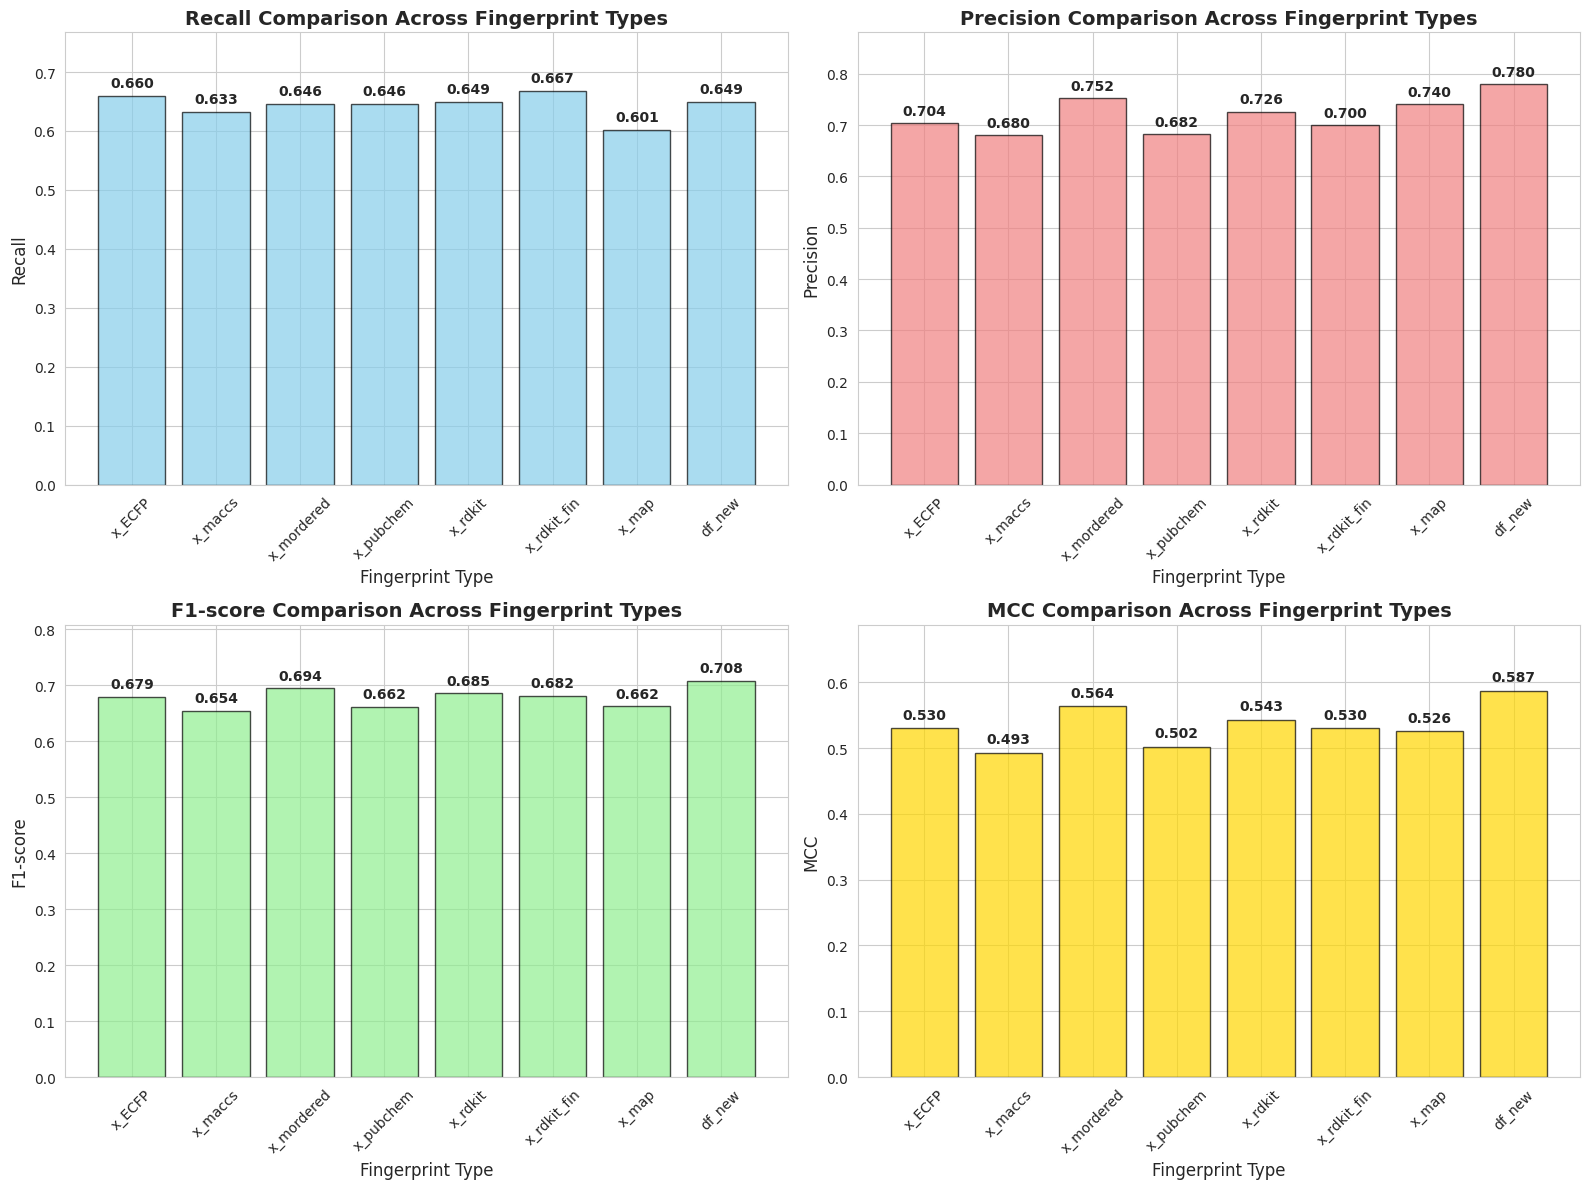

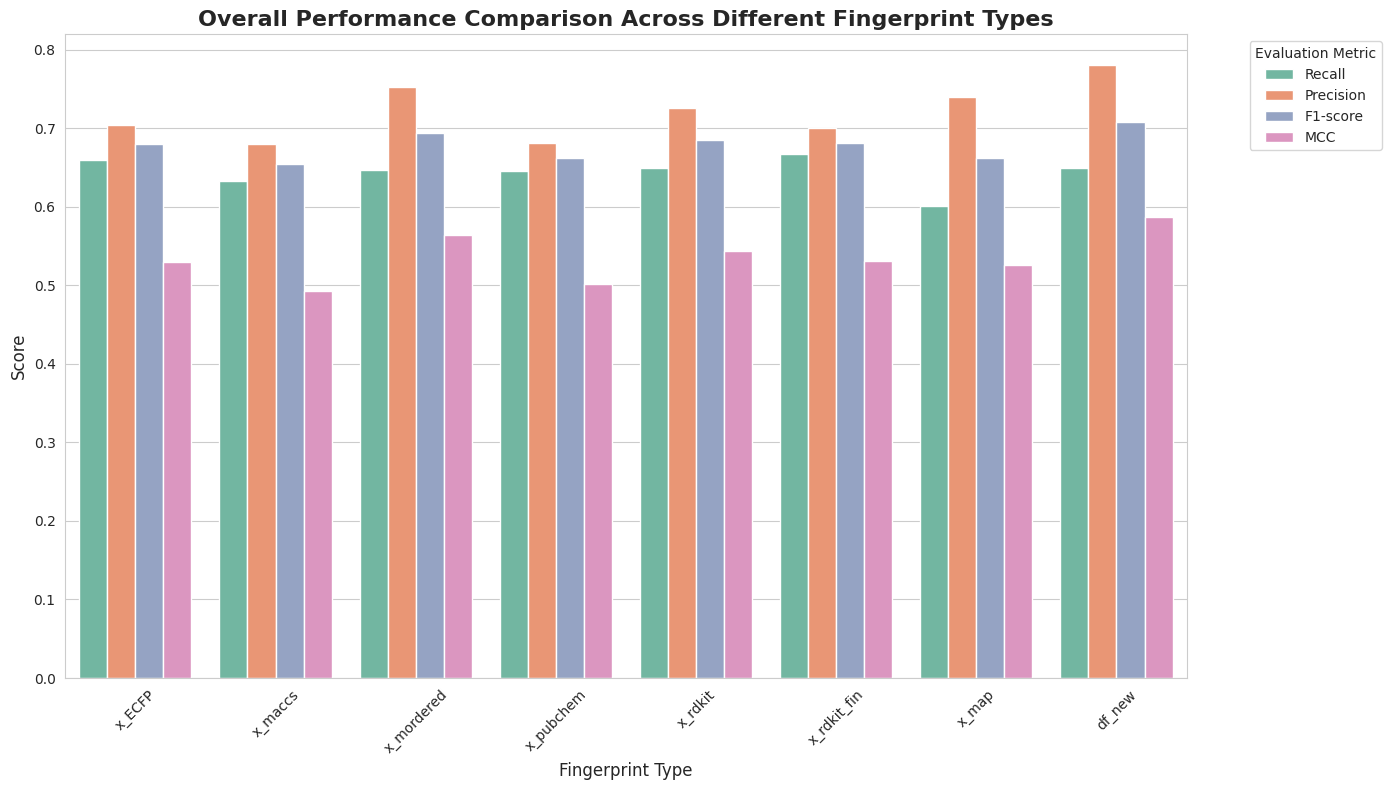

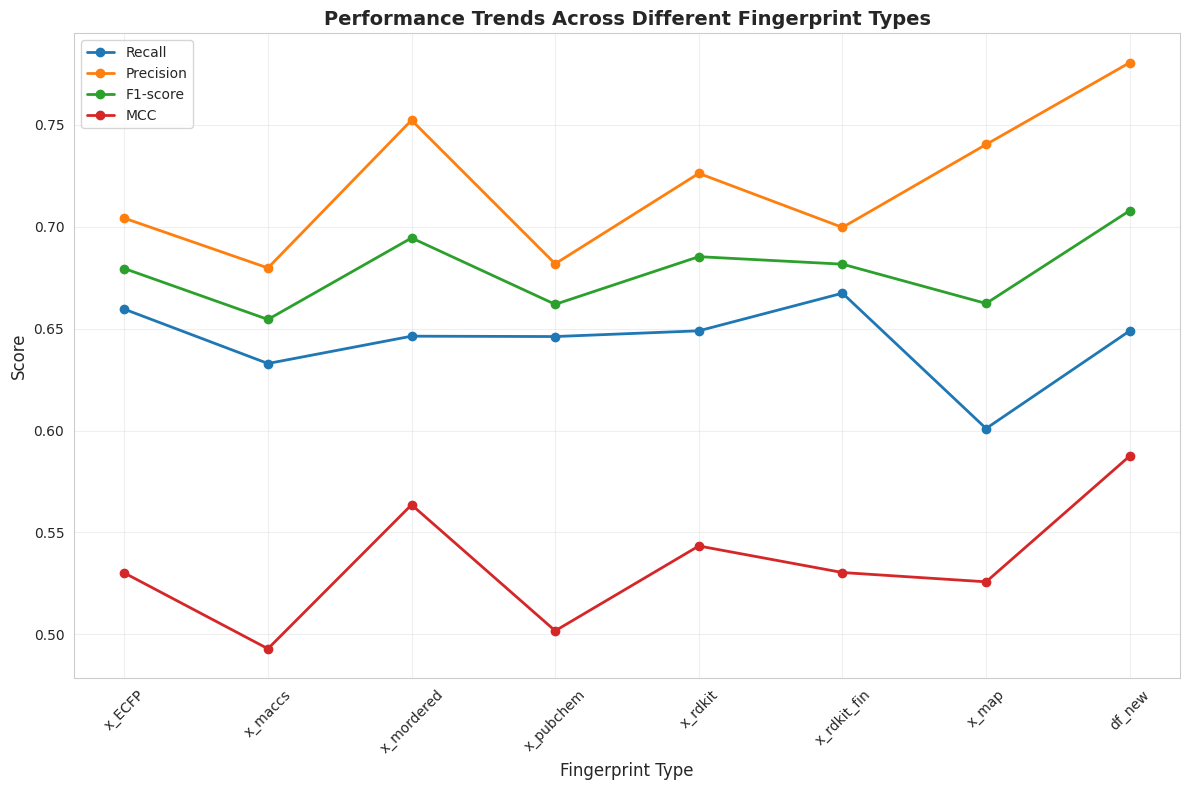

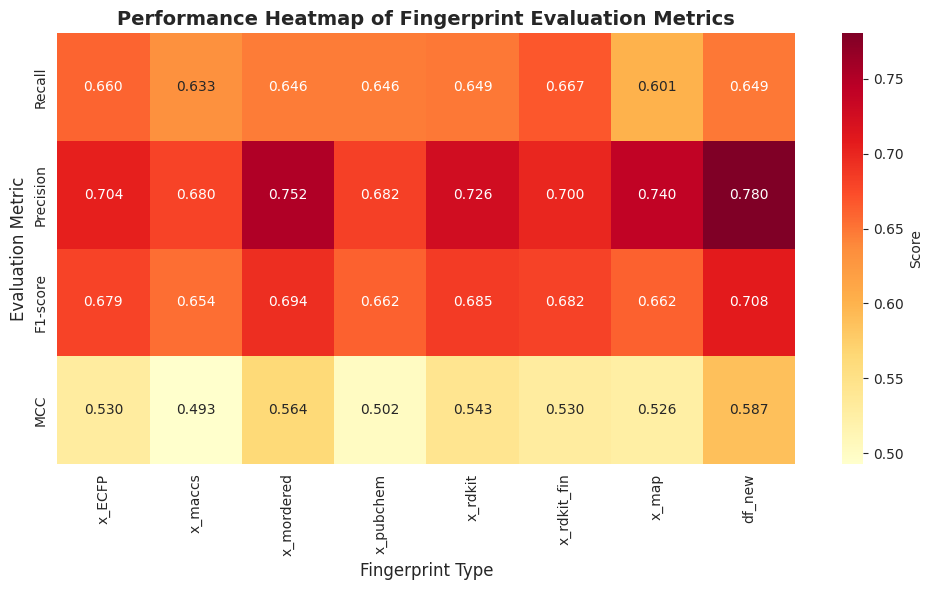

=== Results Summary ===
Fingerprint  Recall  Precision  F1-score    MCC  Recall_std  Precision_std  F1_std  MCC_std
     x_ECFP  0.6595     0.7042    0.6795 0.5301      0.0545         0.0291  0.0315   0.0381
    x_maccs  0.6329     0.6798    0.6545 0.4929      0.0450         0.0428  0.0367   0.0523
 x_mordered  0.6463     0.7523    0.6945 0.5636      0.0481         0.0220  0.0342   0.0414
  x_pubchem  0.6461     0.6818    0.6619 0.5017      0.0377         0.0342  0.0159   0.0246
    x_rdkit  0.6489     0.7262    0.6853 0.5434      0.0250         0.0212  0.0224   0.0316
x_rdkit_fin  0.6674     0.6996    0.6816 0.5303      0.0441         0.0315  0.0211   0.0279
      x_map  0.6010     0.7403    0.6623 0.5258      0.0335         0.0254  0.0165   0.0176
     df_new  0.6489     0.7805    0.7079 0.5875      0.0387         0.0313  0.0285   0.0380

=== Best Fingerprint for Each Metric ===
Recall: x_rdkit_fin (0.6674)
Precision: df_new (0.7805)
F1-score: df_new (0.7079)
MCC: df_new (0.5875)

==

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Chart settings
plt.rcParams['font.family'] = 'DejaVu Sans'
sns.set_style("whitegrid")
plt.figure(figsize=(16, 12))

# Bar charts for each metric
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
metrics = ['Recall', 'Precision', 'F1-score', 'MCC']
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold']

for i, (ax, metric, color) in enumerate(zip(axes.flatten(), metrics, colors)):
    bars = ax.bar(results_df['Fingerprint'], results_df[metric], color=color, alpha=0.7, edgecolor='black')

    # Add values on bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

    ax.set_title(f'{metric} Comparison Across Fingerprint Types', fontsize=14, fontweight='bold')
    ax.set_ylim(0, max(results_df[metric]) + 0.1)
    ax.set_xlabel('Fingerprint Type', fontsize=12)
    ax.set_ylabel(metric, fontsize=12)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Overall comparison chart (all metrics in one chart)
plt.figure(figsize=(14, 8))

# Convert data to appropriate format for grouped bar chart
metrics_data = results_df.melt(id_vars=['Fingerprint'],
                              value_vars=['Recall', 'Precision', 'F1-score', 'MCC'],
                              var_name='Metric', value_name='Score')

# Grouped bar chart
sns.barplot(data=metrics_data, x='Fingerprint', y='Score', hue='Metric', palette='Set2')
plt.title('Overall Performance Comparison Across Different Fingerprint Types', fontsize=16, fontweight='bold')
plt.xlabel('Fingerprint Type', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Evaluation Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Line chart for trend comparison
plt.figure(figsize=(12, 8))
for metric in ['Recall', 'Precision', 'F1-score', 'MCC']:
    plt.plot(results_df['Fingerprint'], results_df[metric], marker='o', linewidth=2, label=metric)

plt.title('Performance Trends Across Different Fingerprint Types', fontsize=14, fontweight='bold')
plt.xlabel('Fingerprint Type', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Heatmap for better comparison
plt.figure(figsize=(10, 6))
heatmap_data = results_df.set_index('Fingerprint')[['Recall', 'Precision', 'F1-score', 'MCC']]
sns.heatmap(heatmap_data.T, annot=True, cmap='YlOrRd', fmt='.3f', cbar_kws={'label': 'Score'})
plt.title('Performance Heatmap of Fingerprint Evaluation Metrics', fontsize=14, fontweight='bold')
plt.xlabel('Fingerprint Type', fontsize=12)
plt.ylabel('Evaluation Metric', fontsize=12)
plt.tight_layout()
plt.show()

# Results summary table
print("=== Results Summary ===")
print(results_df.round(4).to_string(index=False))

# Find best fingerprint for each metric
print("\n=== Best Fingerprint for Each Metric ===")
for metric in ['Recall', 'Precision', 'F1-score', 'MCC']:
    best_fp = results_df.loc[results_df[metric].idxmax(), 'Fingerprint']
    best_score = results_df[metric].max()
    print(f"{metric}: {best_fp} ({best_score:.4f})")

# Performance ranking
print("\n=== Overall Performance Ranking ===")
results_df['Average_Score'] = results_df[['Recall', 'Precision', 'F1-score', 'MCC']].mean(axis=1)
ranking = results_df.sort_values('Average_Score', ascending=False)[['Fingerprint', 'Average_Score']]
for i, (idx, row) in enumerate(ranking.iterrows(), 1):
    print(f"{i}. {row['Fingerprint']}: {row['Average_Score']:.4f}")


In [ ]:
df_selected

In [181]:
model = RandomForestClassifier(random_state=42)
select_fetu = df_all[filtered_features[best_threshold]]
X_train = df_selected.loc[df_selected['dataset']!='FDA', filtered_features[best_threshold]]
y_train = df_selected.loc[df_selected['dataset']!='FDA', 'activity']

In [183]:
y_train.shape

(1414,)

In [184]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Number of FDA drugs predicted: 2628
Number of drugs predicted as active: 7.0
Number of drugs predicted as inactive: 2621.0

Sample results:
                Name                                             Smiles  \
1414        PRAZOSIN      COc1cc2nc(N3CCN(C(=O)c4ccco4)CC3)nc(N)c2cc1OC   
1415        NICOTINE                               CN1CCC[C@H]1c1cccnc1   
1416       OFLOXACIN   CC1COc2c(N3CCN(C)CC3)c(F)cc3c(=O)c(C(=O)O)cn1c23   
1417  NALIDIXIC ACID                    CCn1cc(C(=O)O)c(=O)c2ccc(C)nc21   
1418    INDOMETHACIN     COc1ccc2c(c1)c(CC(=O)O)c(C)n2C(=O)c1ccc(Cl)cc1   
1419       SULBACTAM          CC1(C)[C@H](C(=O)O)N2C(=O)C[C@H]2S1(=O)=O   
1420      TAZOBACTAM  C[C@]1(Cn2ccnn2)[C@H](C(=O)O)N2C(=O)C[C@H]2S1(...   
1421   CIPROFLOXACIN         O=C(O)c1cn(C2CC2)c2cc(N3CCNCC3)c(F)cc2c1=O   
1422     NORFLOXACIN          CCn1cc(C(=O)O)c(=O)c2cc(F)c(N3CCNCC3)cc21   
1423     AMPHETAMINE                                     CC(N)Cc1ccccc1   

      predicted_activity  probabil

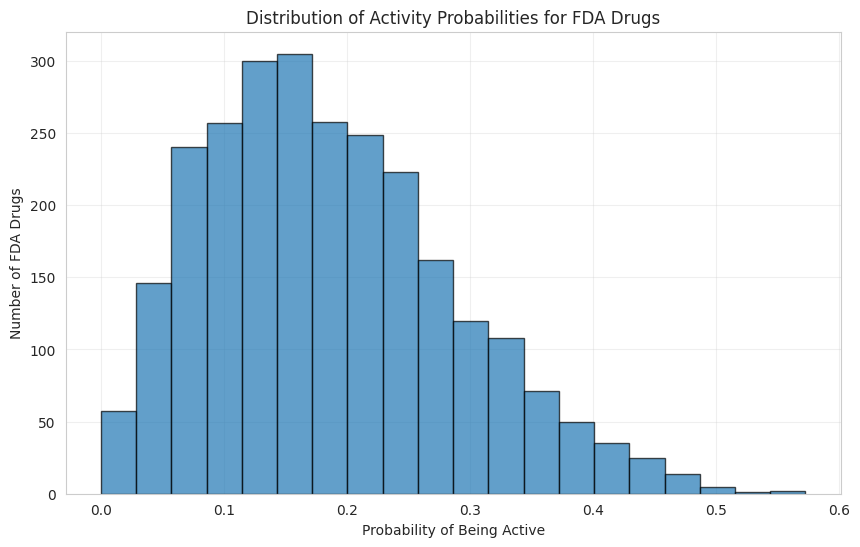

Results saved to fda_predictions.csv
Confidence level analysis:
Confidence >50.0%: 7 active, 2621 inactive
Confidence >60.0%: 0 active, 2542 inactive
Confidence >70.0%: 0 active, 2264 inactive
Confidence >80.0%: 0 active, 1533 inactive
Confidence >90.0%: 0 active, 536 inactive


In [186]:
# Prepare FDA data for prediction
X_fda = df_selected.loc[df_selected['dataset'] == 'FDA', filtered_features[best_threshold]]

# Predict class probabilities
y_pred_proba = model.predict_proba(X_fda)

# Predict classes (0 or 1)
y_pred = model.predict(X_fda)

# Create a DataFrame for results
fda_results = df_selected.loc[df_selected['dataset'] == 'FDA', ['Name', 'Smiles']].copy()
fda_results['predicted_activity'] = y_pred
fda_results['probability_inactive'] = y_pred_proba[:, 0]  # Probability of class 0 (inactive)
fda_results['probability_active'] = y_pred_proba[:, 1]    # Probability of class 1 (active)

# Display results
print(f"Number of FDA drugs predicted: {len(fda_results)}")
print(f"Number of drugs predicted as active: {sum(y_pred)}")
print(f"Number of drugs predicted as inactive: {len(y_pred) - sum(y_pred)}")

# Display some sample results
print("\nSample results:")
print(fda_results.head(10))

# Filter drugs predicted as active with high confidence
high_confidence_active = fda_results[
    (fda_results['predicted_activity'] == 1) &
    (fda_results['probability_active'] > 0.8)
]

print(f"\nNumber of highly confident active drugs (>80%): {len(high_confidence_active)}")

# Further analysis of results:

# Descriptive statistics of probabilities
print("Descriptive statistics of predicted probabilities:")
print(fda_results['probability_active'].describe())

# Plot distribution of probabilities
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(fda_results['probability_active'], bins=20, alpha=0.7, edgecolor='black')
plt.xlabel('Probability of Being Active')
plt.ylabel('Number of FDA Drugs')
plt.title('Distribution of Activity Probabilities for FDA Drugs')
plt.grid(True, alpha=0.3)
plt.show()

# Save results to a file
fda_results.to_csv('fda_predictions.csv', index=False)
print("Results saved to fda_predictions.csv")

# Model confidence evaluation:

# Analysis based on different confidence levels
confidence_levels = [0.5, 0.6, 0.7, 0.8, 0.9]

print("Confidence level analysis:")
for conf in confidence_levels:
    active_high_conf = len(fda_results[
        (fda_results['predicted_activity'] == 1) &
        (fda_results['probability_active'] > conf)
    ])
    inactive_high_conf = len(fda_results[
        (fda_results['predicted_activity'] == 0) &
        (fda_results['probability_inactive'] > conf)
    ])

    print(f"Confidence >{conf*100}%: {active_high_conf} active, {inactive_high_conf} inactive")


In [188]:
fda_results.sort_values('probability_active', ascending=False)

,Name,Smiles,predicted_activity,probability_inactive,probability_active
3668,VERTEPORFIN,C=Cc1c(C)c2cc3nc(cc4[nH]c(cc5nc(cc1[nH]2)C(C)=...,1.0,0.427500,0.572500
3375,MICAFUNGIN SODIUM,CCCCCOc1ccc(-c2cc(-c3ccc(C(=O)N[C@H]4C[C@@H](O...,1.0,0.453333,0.546667
3978,CEFIDEROCOL SULFATE TOSYLATE,CC(C)(O/N=C(\C(=O)N[C@@H]1C(=O)N2C(C(=O)O)=C(C...,1.0,0.460833,0.539167
3851,VOXILAPREVIR,CC[C@@H]1[C@@H]2CN(C(=O)[C@H](C(C)(C)C)NC(=O)O...,1.0,0.485000,0.515000
3536,GRAZOPREVIR,C=C[C@@H]1C[C@]1(NC(=O)[C@@H]1C[C@@H]2CN1C(=O)...,1.0,0.488333,0.511667
...,...,...,...,...,...
2937,RUBIDIUM CHLORIDE RB 82,[82Rb+].[Cl-],0.0,1.000000,0.000000
2132,PRAMOXINE,CCCCOc1ccc(OCCCN2CCOCC2)cc1,0.0,1.000000,0.000000
1468,ISOPROTERENOL,CC(C)NCC(O)c1ccc(O)c(O)c1,0.0,1.000000,0.000000
2910,ZINC CHLORIDE,[Cl-].[Cl-].[Zn+2],0.0,1.000000,0.000000
